In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

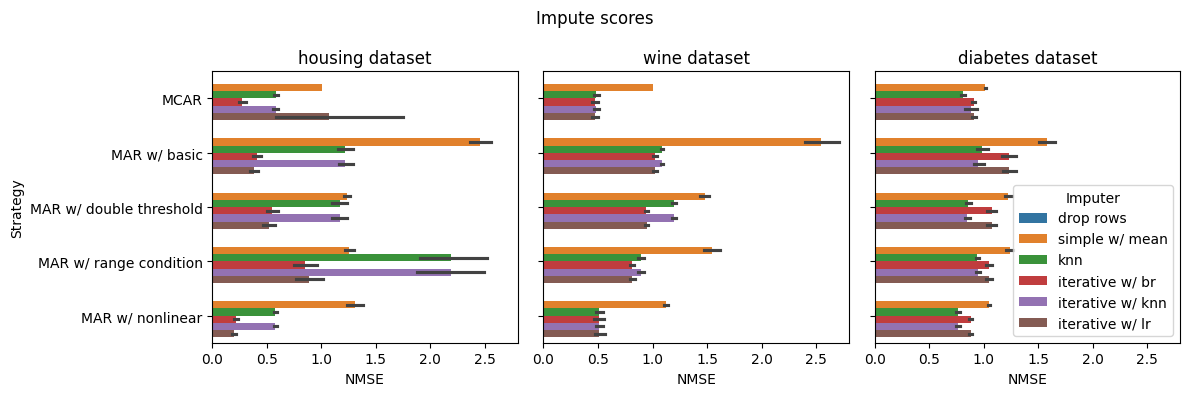

In [6]:
ds_names = ['housing', 'wine', 'diabetes']
fig, axes = plt.subplots(1, len(ds_names), figsize=(4*len(ds_names), 4), sharey=True)
axes = axes.flatten()
x_min, x_max = 0, 2.8
for ds_name, ax in zip(ds_names, axes):
    df = pd.read_csv(f'experiments/{ds_name}_test_imputers_scores.csv')
    df.loc[df.strategy == 'none', 'strategy'] = 'MCAR'
    df.loc[df.strategy == 'basic', 'strategy'] = 'MAR w/ basic'
    df.loc[df.strategy == 'double_threshold', 'strategy'] = 'MAR w/ double threshold'
    df.loc[df.strategy == 'range_condition', 'strategy'] = 'MAR w/ range condition'
    df.loc[df.strategy == 'nonlinear', 'strategy'] = 'MAR w/ nonlinear'
    sns.barplot(
        data=df,
        x='impute_nmse',
        y='strategy',
        hue='impute',
        orient='h',
        errorbar='ci',
        ax=ax,
    )
    ax.set_title(f'{ds_name} dataset')
    ax.legend().set_visible(False)
    ax.set_xlabel('NMSE')
    ax.set_ylabel('Strategy')
    ax.set_xlim(x_min, x_max)
handles, labels = axes[0].get_legend_handles_labels()
axes[2].legend(handles, labels, loc='lower right', title='Imputer')
# axes[-1].axis('off')
fig.suptitle('Impute scores')
fig.tight_layout()
fig.savefig('images/impute_scores.pdf', format='pdf')
plt.show()

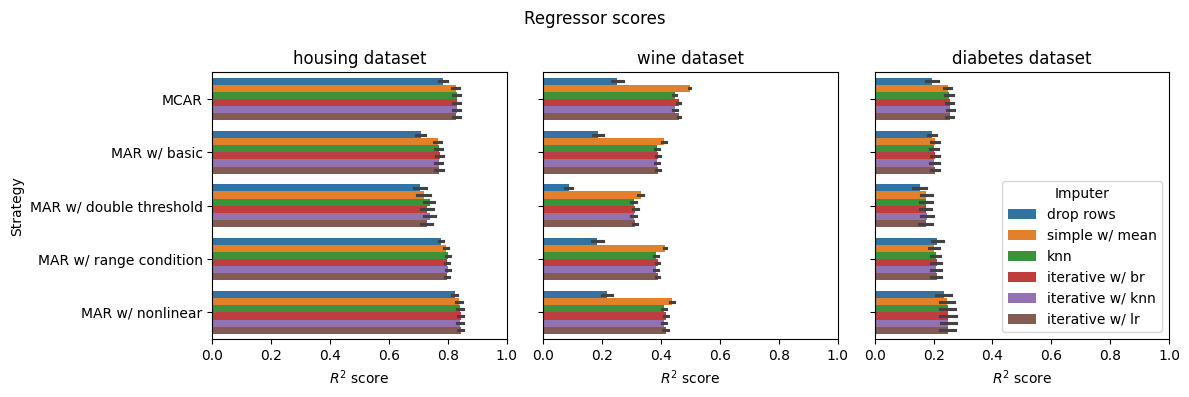

<Figure size 640x480 with 0 Axes>

In [ ]:
ds_names = ['housing', 'wine', 'diabetes']
fig, axes = plt.subplots(1, len(ds_names), figsize=(4*len(ds_names), 4), sharey=True)
axes = axes.flatten()
x_min, x_max = 0, 2.8
for ds_name, ax in zip(ds_names, axes):
    df = pd.read_csv(f'experiments/{ds_name}_test_imputers_scores.csv')
    df.loc[df.strategy == 'none', 'strategy'] = 'MCAR'
    df.loc[df.strategy == 'basic', 'strategy'] = 'MAR w/ basic'
    df.loc[df.strategy == 'double_threshold', 'strategy'] = 'MAR w/ double threshold'
    df.loc[df.strategy == 'range_condition', 'strategy'] = 'MAR w/ range condition'
    df.loc[df.strategy == 'nonlinear', 'strategy'] = 'MAR w/ nonlinear'
    sns.barplot(
        data=df,
        x='acc',
        y='strategy',
        hue='impute',
        orient='h',
        errorbar='ci',
        ax=ax,
    )
    ax.set_title(f'{ds_name} dataset')
    ax.legend().set_visible(False)
    ax.set_xlabel('$R^2$ score')
    ax.set_ylabel('Strategy')
    ax.set_xlim(0, 1)
handles, labels = axes[0].get_legend_handles_labels()
axes[2].legend(handles, labels, loc='lower right', title='Imputer')
# axes[-1].axis('off')
fig.suptitle('Regressor scores')
fig.tight_layout()
fig.savefig('images/regressor_scores.pdf', format='pdf')
plt.show()